In [1]:
from hmf.transfer import Transfer

In [17]:
teh_nl_tk = Transfer(transfer_model="EH", takahashi=True, z= 8.0)
teh_nl_ntk = Transfer(transfer_model="EH", takahashi=False, z=8.0)


In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [20]:
teh_nl_tk.update(z=0)

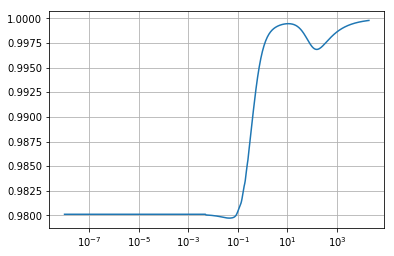

In [22]:
plt.plot(teh_nl_tk.k, np.abs(teh_nl_ntk.nonlinear_power/teh_nl_tk.nonlinear_power -1))
#plt.plot(teh_nl_ntk.k, teh_nl_ntk.nonlinear_power)
#plt.plot(teh_nl_ntk.k, teh_nl_ntk.power)

plt.xscale('log')
#plt.yscale('log')
plt.grid(True)

In [8]:
np.log(1e3)

6.9077552789821368

In [11]:
from astropy.cosmology import Planck15

In [15]:
Planck15.Om(8.0)

0.99009841609741556